In [1]:
import keras 
from keras import layers
from keras import models
import numpy as np
import os

Using TensorFlow backend.


In [2]:
data = [r"Class/Corel10000/"+img for img in os.listdir("Class/Corel10000") if img.endswith('.jpg')] #collecting the corel10000
#pass

In [3]:
###Preprocessing code is written to prepare the data

"""import cv2
import matplotlib.pyplot as plt

for i in range(len(data)):
    img = cv2.imread(r"Class/Corel10000/"+data[i])
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    cv2.imwrite(f"data/{data[i][:-4]}"+".jpg", img)
    print(f"written+{data[i][:-4]}")
    #plt.imshow(img)"""

pass

In [4]:
#data = [r"data/"+img for img in os.listdir("data/") if img.endswith('.jpg')]

In [5]:
import cv2
img = cv2.imread(r"data/"+data[1])

In [6]:
li = []

model =models.Sequential()
model.add(layers.Conv2D(8, kernel_size=2, padding='valid', strides=1, activation='relu', input_shape=(128, 128, 3)))
model.add(layers.Conv2D(16, kernel_size=2, padding='valid', strides=1, activation='relu'))
model.add(layers.Dropout(0.25))
model.add(layers.Conv2D(32, kernel_size=2, padding='valid', strides=1, activation='relu'))
model.add(layers.Conv2D(64, kernel_size=2, padding='valid', strides=1, activation='relu'))
model.add(layers.Dropout(0.25))
model.add(layers.MaxPool2D((2, 2)))

model.add(layers.Flatten())
model.add(layers.Dense(400, activation='relu', name='dense1'))
model.add(layers.Dropout(0.25))
model.add(layers.Dense(200, activation='relu', name='dense2'))
model.add(layers.Dropout(0.25))
model.add(layers.Dense(115, activation='relu', name='dense3'))
model.add(layers.Dense(10, activation='relu', name='dense4'))
model.add(layers.Dense(1, activation='tanh'))

print(model.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 127, 127, 8)       104       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 126, 126, 16)      528       
_________________________________________________________________
dropout_1 (Dropout)          (None, 126, 126, 16)      0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 125, 125, 32)      2080      
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 124, 124, 64)      8256      
_________________________________________________________________
dropout_2 (Dropout)          (None, 124, 124, 64)      0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 62, 62, 64)       

In [7]:
train_data = keras.preprocessing.image.ImageDataGenerator(rescale = 1./255,
                                    featurewise_center=True, 
                                    samplewise_center=True, 
                                    featurewise_std_normalization=True, 
                                    samplewise_std_normalization=True, 
                                    zca_whitening=False, zca_epsilon=1e-06, 
                                    rotation_range=40, width_shift_range=0.0,
                                    height_shift_range=0.0, brightness_range=(0.2, 0.2),
                                    shear_range=0.2, zoom_range=0.2, 
                                    channel_shift_range=0.0, fill_mode='nearest', 
                                    cval=0.0, horizontal_flip=True, vertical_flip=True,
                                    data_format=None, validation_split=0.0, dtype=None)

In [8]:
test = train_data.flow_from_directory(r"C:\Users\SUPERMAN\Desktop\hand\Phd1\Class",
                                     target_size=(256, 256), classes = ['Corel10000'],
                                     class_mode='categorical', batch_size=64, seed=1)

Found 10000 images belonging to 1 classes.


In [9]:
model.compile(optimizer = 'sgd',
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [10]:
from keras import backend as K

lis = []
i =  0
for j in data:
    #print(j)
    #print(i)
    if i < 1000:
        j = test
        inp = model.input   # input placeholder
        outputs = [layer.output for layer in model.layers]    # all layer outputs
        #print(outputs)
        functors = [K.function([inp, K.learning_phase()], [out]) for out in outputs]    # evaluation functions
        #print(functors)

        # Testing
        test = np.random.random((128, 128, 3))[np.newaxis,...]
        layer_outs = lis.append([i([test, 1]) for i in functors if i == functors[-2]])
        #print(layer_outs)
    else:
        break
    i = i+1

In [11]:
testing = 'Class/Corel10000/0_99.jpg'
#print(testing)

lis_test = []
inp = model.input   # input placeholder
outputs = [layer.output for layer in model.layers]    # all layer outputs
#print(outputs)
functors = [K.function([inp, K.learning_phase()], [out]) for out in outputs]    # evaluation functions
#print(functors)
#print(functors) # Testing
testing = np.random.random((128, 128, 3))[np.newaxis,...]

layer_outs = lis_test.append([i([testing, 1]) for i in functors if i == functors[-2]])

In [12]:
(lis[3][0][0][0])

array([0.07483859, 0.03825496, 0.        , 0.06995933, 0.        ,
       0.        , 0.        , 0.        , 0.29214737, 0.11642443],
      dtype=float32)

In [13]:
#lis_test[0][0][0][0]

In [14]:
#len(lis)

In [15]:
#lis_test[0][0][0][0]

In [16]:
from sklearn.metrics.pairwise import euclidean_distances

In [17]:
distances = {}
for i in range(len(lis)):
    distances[data[i]] = sum(euclidean_distances(lis[i][0][0][0].reshape(1, -1), lis_test[0][0][0][0].reshape(1, -1))).sum()

In [18]:
sorted_dict = {k: v for k, v in sorted(distances.items(), key=lambda item: item[1])}

In [19]:
#print(sorted_dict)

In [20]:
import cv2
import matplotlib.pyplot as plt

Lowest Distance:- Class/Corel10000/17_1757.jpg 0.030198926


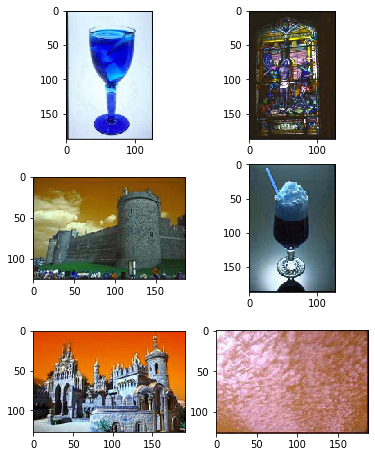

In [21]:

fig,  ((ax1, ax2), (ax3, ax4), (ax5, ax6)) = plt.subplots(3,2,figsize=(6,8))


img  = cv2.imread(list(sorted_dict.keys())[0])
img1 = cv2.imread(list(sorted_dict.keys())[1])
img2 = cv2.imread(list(sorted_dict.keys())[2])
img3 = cv2.imread(list(sorted_dict.keys())[3])
img4 = cv2.imread(list(sorted_dict.keys())[4])
img5 = cv2.imread(list(sorted_dict.keys())[5])


print("Lowest Distance:-", list(sorted_dict.keys())[0],list(sorted_dict.values())[0])
ax1.imshow(img)
ax2.imshow(img1)
ax3.imshow(img2)
ax4.imshow(img3)
ax5.imshow(img4)
ax6.imshow(img5)


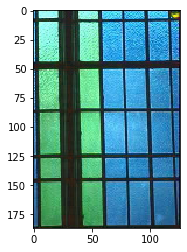

In [22]:
img = cv2.imread('Class/Corel10000/0_99.jpg')
plt.imshow(img)